In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [2]:
anime = pd.read_csv("animes.csv")
anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",6-Jan-17,1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
jumlah_unik = anime['members'].nunique()
print(f"Jumlah Members: {jumlah_unik}")

Jumlah Members: 8803


In [4]:
anime.select_dtypes(include='object').nunique()

title       16214
synopsis    15194
genre        4851
aired       11114
img_url     16051
link        16216
dtype: int64

In [5]:
anime.dtypes

uid             int64
title          object
synopsis       object
genre          object
aired          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
img_url        object
link           object
dtype: object

In [6]:
anime.duplicated().sum()

2943

In [7]:
# Menandai baris-baris yang duplikat
duplikat = anime[anime.duplicated()]

# Menampilkan data yang terduplikat
print(duplikat)


         uid                                              title  \
3065   18483  Bishoujo Animerama: Manami no Michi Tono Sou N...   
3071   29111  Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho   
3077   28891                            Haikyuu!! Second Season   
3078   23273                            Shigatsu wa Kimi no Uso   
3079   34599                                      Made in Abyss   
...      ...                                                ...   
19306  32979                                      Flip Flappers   
19307    123                                      Fushigi Yuugi   
19308   1281                                   Gakkou no Kaidan   
19309    450        InuYasha Movie 2: Kagami no Naka no Mugenjo   
19310     87           Mobile Suit Gundam: Char's Counterattack   

                                                synopsis  \
3065                A mix of animation and live-action.    
3071                                                 NaN   
3077   Followin

In [8]:
# Menghapus duplikat berdasarkan seluruh kolom
anime = anime.drop_duplicates()

In [9]:
anime.duplicated().sum()

0

In [10]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16368 entries, 0 to 19006
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         16368 non-null  int64  
 1   title       16368 non-null  object 
 2   synopsis    15583 non-null  object 
 3   genre       16368 non-null  object 
 4   aired       16368 non-null  object 
 5   episodes    15825 non-null  float64
 6   members     16368 non-null  int64  
 7   popularity  16368 non-null  int64  
 8   ranked      14611 non-null  float64
 9   score       15964 non-null  float64
 10  img_url     16202 non-null  object 
 11  link        16368 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.6+ MB


In [57]:
# Mengecek apakah ada NaN dalam DataFrame X
if anime.isnull().values.any():
    print("Terdapat nilai NaN dalam DataFrame anime.")
else:
    print("Tidak ada nilai NaN dalam DataFrame anime.")


Terdapat nilai NaN dalam DataFrame anime.


In [58]:
# Mengganti NaN dengan nilai rata-rata dalam kolom
anime.fillna(anime.mean(), inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_17204\3106852849.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anime.fillna(anime.mean(), inplace=True)


# Analisis Deskriptif

In [11]:
# Describe Continuous
anime.describe()

,uid,episodes,members,popularity,ranked,score
count,16368.000000,15825.000000,1.636800e+04,16368.000000,14611.000000,15964.000000
mean,19920.474707,11.658578,2.766506e+04,8131.919599,7311.196701,6.350745
std,14227.234351,48.853601,9.364677e+04,4714.683351,4243.135518,0.975120
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,5307.750000,1.000000,2.970000e+02,4042.500000,3623.500000,5.700000
50%,19952.000000,2.000000,1.879000e+03,8115.000000,7316.000000,6.380000
75%,34178.250000,12.000000,1.190100e+04,12208.250000,10978.500000,7.050000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [12]:
# Describe categorical columns
anime.describe(exclude=[np.number])

,title,synopsis,genre,aired,img_url,link
count,16368,15583,16368,16368,16202,16368
unique,16214,15194,4851,11114,16051,16216
top,3-gatsu no Lion: Ugoku! Nya Shogi,No synopsis has been added for this series yet...,['Hentai'],Not available,https://cdn.myanimelist.net/images/anime/1225/...,https://myanimelist.net/anime/39535/Mushoku_Te...
freq,2,37,946,295,2,2


# Distribution

Type Integer

<function matplotlib.pyplot.show(close=None, block=None)>

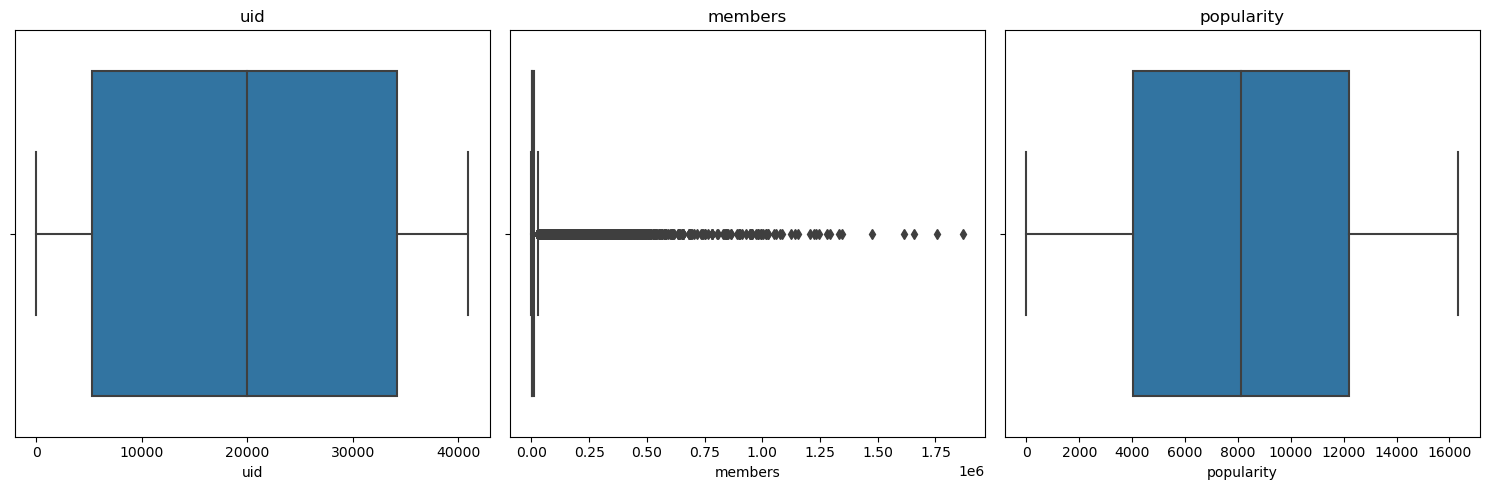

In [13]:
# gets names of all columns with data type int
name_int = anime.select_dtypes(include='int').columns.tolist()
# sub plots
num_cols = len(name_int)
# to make sure there are enough rows for the subplots
num_rows = (num_cols+2)//3 
fig, axs = plt.subplots(nrows=num_rows, ncols =3, figsize=(15,5*num_rows))
axs = axs.flatten()
# Countplot for each integer variable
for i, var in enumerate(name_int):
    sns.boxplot(x=anime[var], ax=axs[i])
    axs[i].set_title(var)

#Remove any extra emply subplot if needed
if num_cols < len(axs): 
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
#adjust spacing between sub plots
fig.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

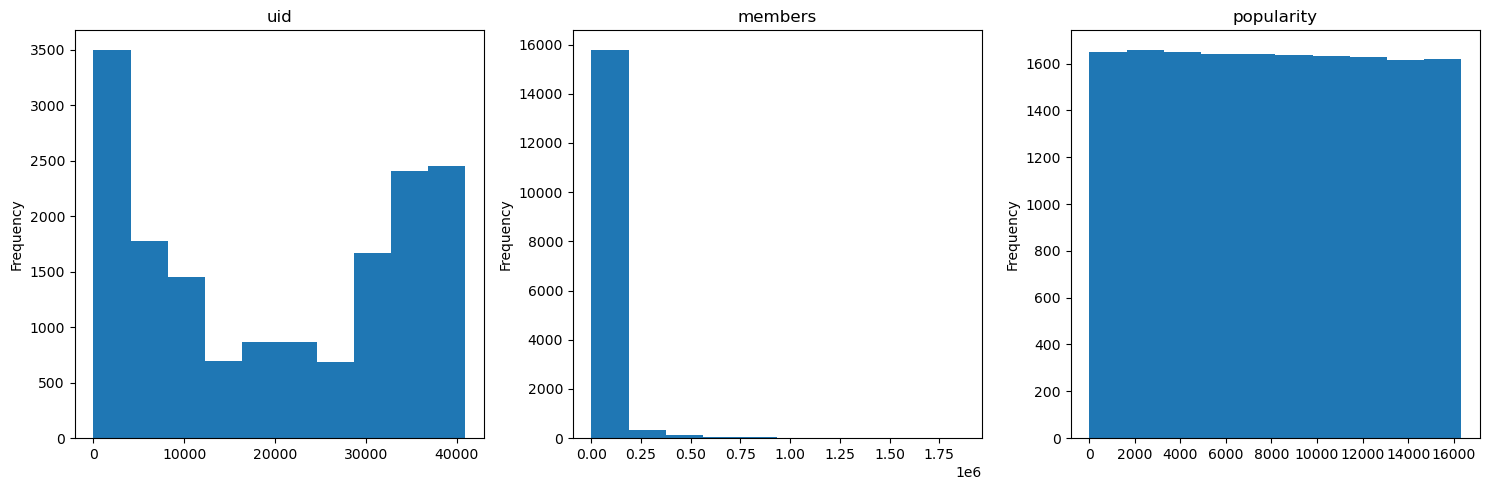

In [14]:
# gets names of all columns with data type int
name_int = anime.select_dtypes(include='int').columns.tolist()
# sub plots
num_cols = len(name_int)
# to make sure there are enough rows for the subplots
num_rows = (num_cols+2)//3 
fig, axs = plt.subplots(nrows=num_rows, ncols =3, figsize=(15,5*num_rows))
axs = axs.flatten()

# Count histogram or each integer variable
for i, var in enumerate(name_int):
    anime[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

#Remove any extra emply subplot if needed
if num_cols < len(axs): 
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
#adjust spacing between sub plots
fig.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

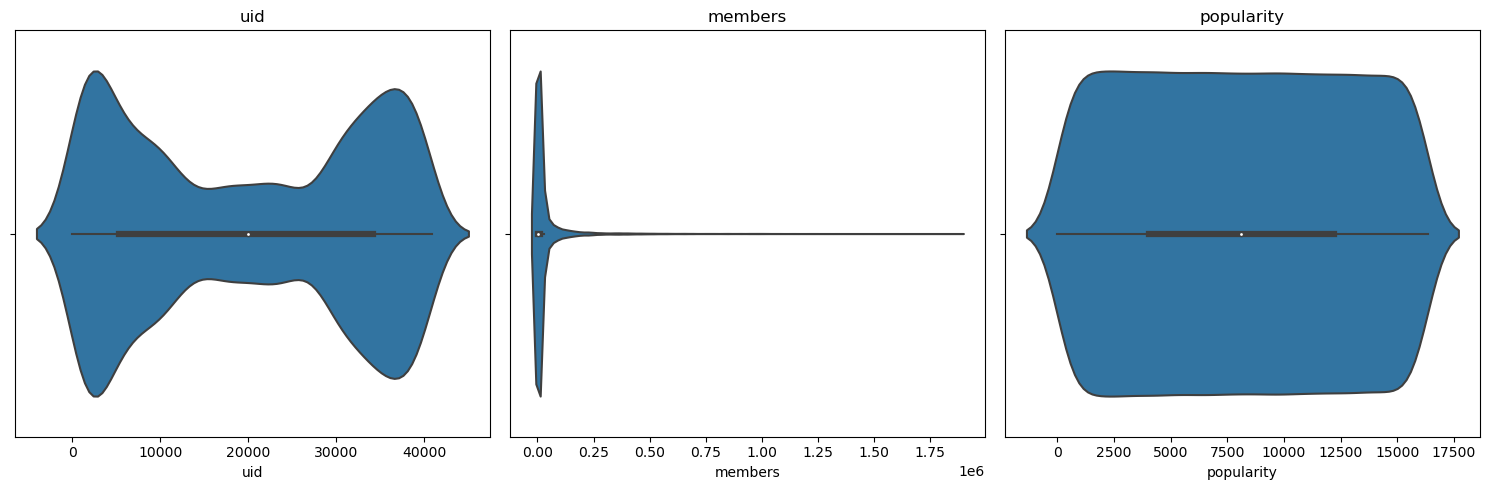

In [15]:

name_int = anime.select_dtypes(include='int').columns.tolist()
num_cols = len(name_int)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Countplot for each integer variable
for i, var in enumerate(name_int):
    sns.violinplot(x=anime[var], ax=axs[i])
    axs[i].set_title(var)

#Remove any extra emply subplot if needed
if num_cols < len(axs): 
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
#adjust spacing between sub plots
fig.tight_layout()

plt.show

Type Data: Object

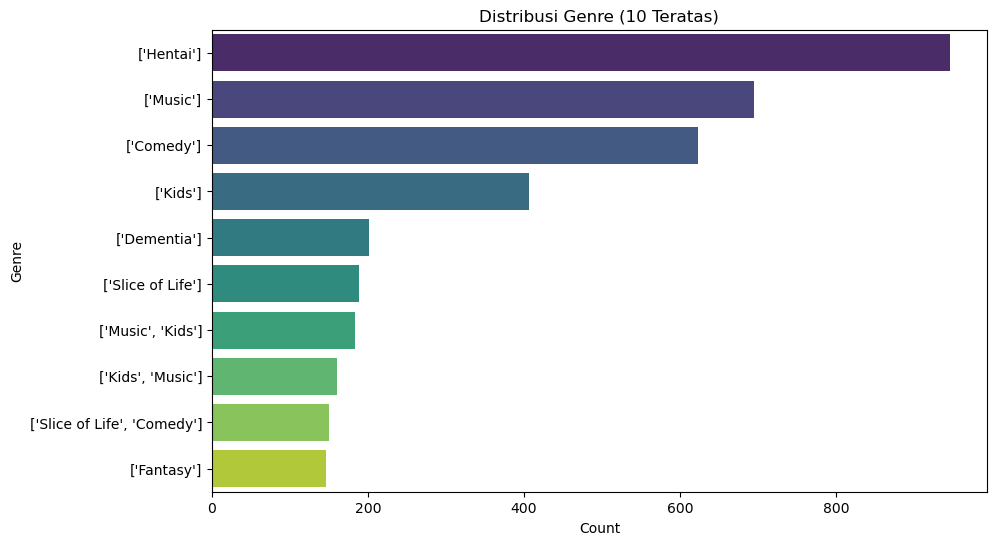

In [18]:
# Distribusi Genre
genre_distribution = anime['genre'].value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(data=anime, y='genre', order=anime['genre'].value_counts().index[:10], palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribusi Genre (10 Teratas)')
plt.show()

Type Data: FLoat

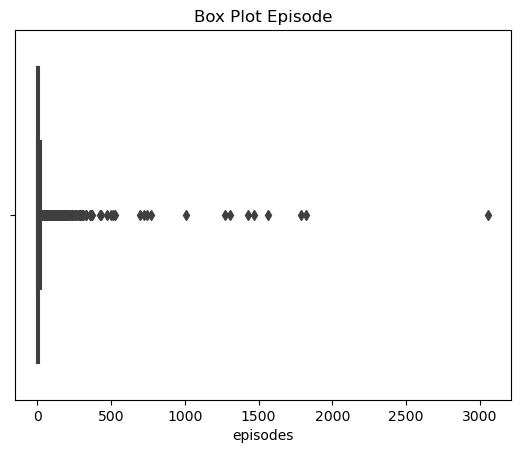

In [31]:
sns.boxplot(data=anime, x='episodes')
plt.title('Box Plot Episode')
plt.show()

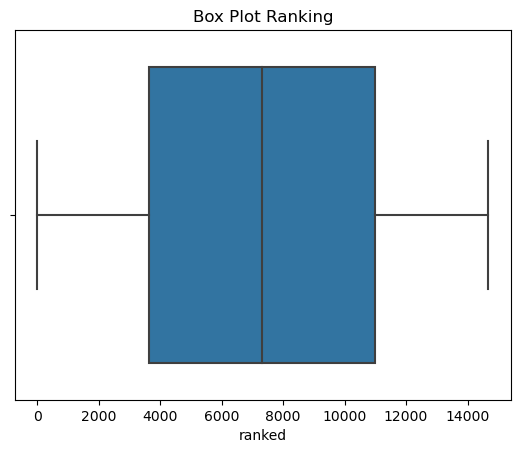

In [30]:
sns.boxplot(data=anime, x='ranked')
plt.title('Box Plot Ranking')

plt.show()

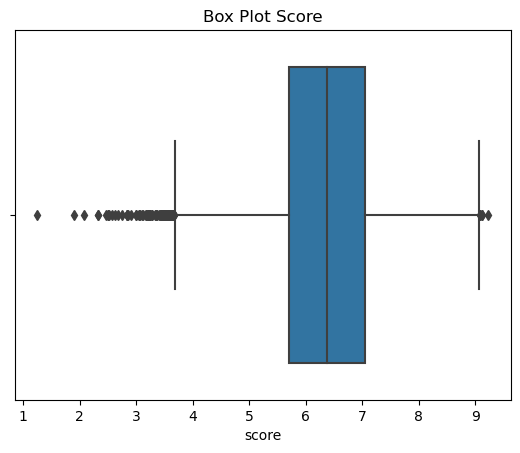

In [33]:
sns.boxplot(data=anime, x='score')
plt.title('Box Plot Score')

plt.show()

# Analisa Peluang Variabel Diskrit

Episodes, Members, Popularity

In [46]:
# Menghitung korelasi antara jumlah episode dengan popularitas, ranked, dan score
correlation_popularity = anime['episodes'].corr(anime['popularity'])
correlation_ranked = anime['episodes'].corr(anime['ranked'])
correlation_score = anime['episodes'].corr(anime['score'])

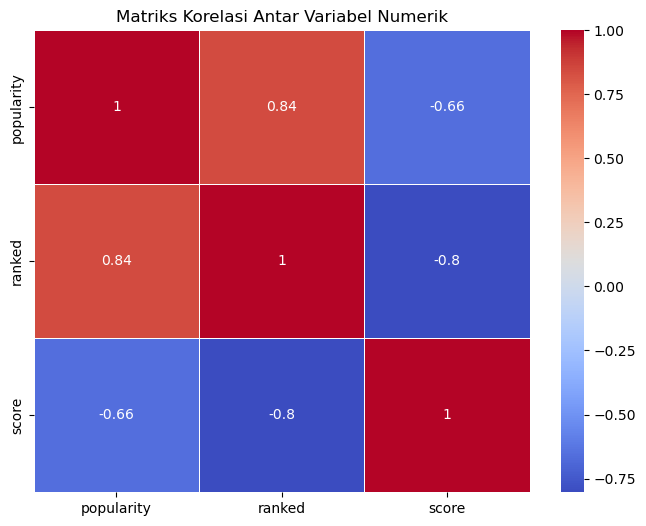

In [51]:
# Memilih hanya kolom-kolom numerik
numeric_cols = ['popularity', 'ranked', 'score']
# Membuat matriks korelasi
correlation_matrix = anime[numeric_cols].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

R-squared: 0.6819699595161866


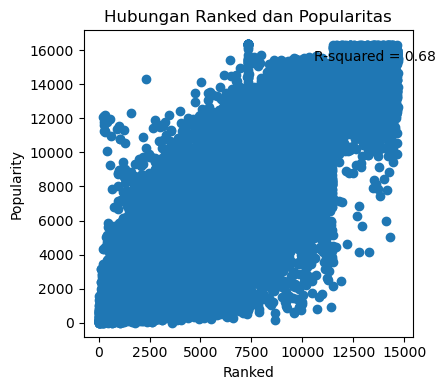

In [63]:

from sklearn.linear_model import LinearRegression
X = anime['ranked'].values.reshape(-1, 1)
y = anime['popularity'].values
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

# Memilih hanya kolom-kolom numerik
numeric_cols = ['popularity', 'ranked', 'score']

# Visualisasi hubungan antara jumlah episode dan populasi, ranked, dan score
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
X = anime['ranked'].values.reshape(-1, 1)
y = anime['popularity'].values
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)
plt.scatter(X, y)
plt.xlabel('Ranked')
plt.ylabel('Popularity')
plt.title('Hubungan Ranked dan Popularitas')
plt.annotate(f'R-squared = {r_squared:.2f}', xy=(0.7, 0.9), xycoords='axes fraction')


plt.tight_layout()
plt.show()

# Uji Hipotesis

In [67]:
from scipy import stats

# Filter data anime dengan rata-rata skor > 8
anime_high_score = anime[anime['score'] > 8]

# Filter data anime dengan jumlah episode > 10
anime_over_10_episodes = anime[anime['episodes'] > 10]

# Uji T (Independent T-test) untuk membandingkan rata-rata jumlah episode antara dua kelompok
t_statistic, p_value_t = stats.ttest_ind(anime_high_score['episodes'], anime_over_10_episodes['episodes'])

# Uji F (ANOVA) untuk membandingkan varians jumlah episode antara dua kelompok
f_statistic, p_value_f = stats.f_oneway(anime_high_score['episodes'], anime_over_10_episodes['episodes'])

alpha = 0.05

print("Hasil Uji T:")
print("T-Statistic:", t_statistic)
print("P-Value (Uji T):", p_value_t)

print("\nHasil Uji F:")
print("F-Statistic:", f_statistic)
print("P-Value (Uji F):", p_value_f)

if p_value_t < alpha:
    print("Rata-rata jumlah episode berbeda signifikan antara dua kelompok.")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata jumlah episode antara dua kelompok.")

if p_value_f < alpha:
    print("Varians jumlah episode berbeda signifikan antara dua kelompok.")
else:
    print("Tidak ada perbedaan signifikan dalam varians jumlah episode antara dua kelompok.")


Hasil Uji T:
T-Statistic: -4.31151842970076
P-Value (Uji T): 1.6476220861217904e-05

Hasil Uji F:
F-Statistic: 18.589191169649308
P-Value (Uji F): 1.6476220861261743e-05
Rata-rata jumlah episode berbeda signifikan antara dua kelompok.
Varians jumlah episode berbeda signifikan antara dua kelompok.


# Analisa Peluang Variabel Kontinu

Ranked, Score

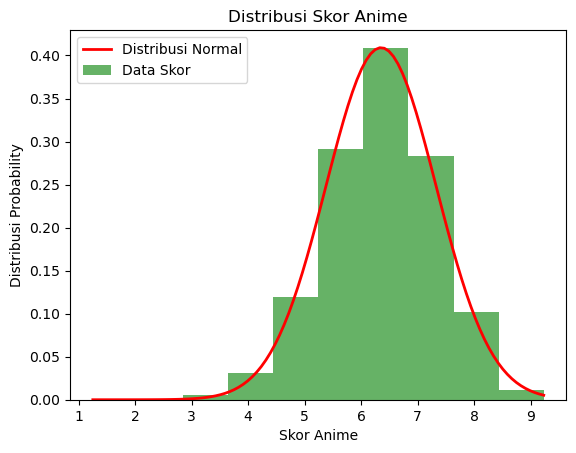

In [35]:
#1. Distribusi Score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data skor anime 
anime_score = anime['score']
# Analisis Distribusi Skor Menggunakan Histogram
plt.hist(anime_score, bins=10, density=True, alpha=0.6, color='g')

# Estimasi Parameter Distribusi Normal
mean_skor = np.mean(anime_score)
std_deviasi = np.std(anime_score)

# Menghasilkan Distribusi Normal
skor_normal = np.linspace(anime_score.min(), anime_score.max(), 100)
pdf_normal = norm.pdf(skor_normal, loc=mean_skor, scale=std_deviasi)

# Plot Distribusi Normal
plt.plot(skor_normal, pdf_normal, color='r', linewidth=2)
plt.xlabel('Skor Anime')
plt.ylabel('Distribusi Probability')
plt.title('Distribusi Skor Anime')
plt.legend(['Distribusi Normal', 'Data Skor'])
plt.show()


In [36]:
# 1.2. Estimati rata-rata
from scipy.stats import norm

# Estimasi Rata-rata Skor dengan Interval Kepercayaan
alpha = 0.05  # Tingkat kepercayaan
mean_skor = np.mean(anime_score)
std_deviasi = np.std(anime_score)

# Menghitung interval kepercayaan 95% untuk rata-rata skor
z = norm.ppf(1 - alpha / 2)
margin_of_error = z * (std_deviasi / np.sqrt(len(anime_score)))
confidence_interval = (mean_skor - margin_of_error, mean_skor + margin_of_error)

print(f"Estimasi Rata-rata Skor: {mean_skor:.2f}")
print(f"Interval Kepercayaan 95%: {confidence_interval}")


Estimasi Rata-rata Skor: 6.35
Interval Kepercayaan 95%: (6.335806722167492, 6.365682879436116)


In [37]:
# 1.3. Menghitung Mean
mean_skor = np.mean(anime_score)

# Menghitung Varians
varians_skor = np.var(anime_score)

# Expectation adalah sama dengan mean
expectation_skor = mean_skor

print(f"Mean Skor: {mean_skor:.2f}")
print(f"Varians Skor: {varians_skor:.2f}")
print(f"Expectation Skor: {expectation_skor:.2f}")

Mean Skor: 6.35
Varians Skor: 0.95
Expectation Skor: 6.35


In [68]:

# Filter data anime dengan genre "hentai"
anime_hentai = anime[anime['genre'].str.contains("Hentai", case=False, na=False)]

# Filter data anime dengan rata-rata skor > 8
anime_high_score = anime[anime['score'] > 8]

# Uji T (Independent T-test) untuk membandingkan rata-rata skor antara dua kelompok
t_statistic, p_value_t = stats.ttest_ind(anime_hentai['score'], anime_high_score['score'], equal_var=False)

# Uji F (ANOVA) untuk membandingkan varians skor antara dua kelompok
f_statistic, p_value_f = stats.f_oneway(anime_hentai['score'], anime_high_score['score'])

alpha = 0.05

print("Hasil Uji T:")
print("T-Statistic:", t_statistic)
print("P-Value (Uji T):", p_value_t)

print("\nHasil Uji F:")
print("F-Statistic:", f_statistic)
print("P-Value (Uji F):", p_value_f)

if p_value_t < alpha:
    print("Rata-rata skor berbeda signifikan antara dua kelompok.")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata skor antara dua kelompok.")

if p_value_f < alpha:
    print("Varians skor berbeda signifikan antara dua kelompok.")
else:
    print("Tidak ada perbedaan signifikan dalam varians skor antara dua kelompok.")

Hasil Uji T:
T-Statistic: -94.04980757484114
P-Value (Uji T): 0.0

Hasil Uji F:
F-Statistic: 4738.034436979009
P-Value (Uji F): 0.0
Rata-rata skor berbeda signifikan antara dua kelompok.
Varians skor berbeda signifikan antara dua kelompok.
